In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from const import *
plt.style.use('seaborn-poster')
from scipy.optimize import fsolve

In [30]:
def sputter(x):
    a = 1
    b = 1
    wp = 2*np.pi/3.15
    return (a + b*np.cos(wp*x + np.pi/2+0.2)) + (a + b*np.cos(wp*x - np.pi/2-0.2))

In [33]:
x = np.linspace(-3.15,3.15,300)
profile = sputter(x)

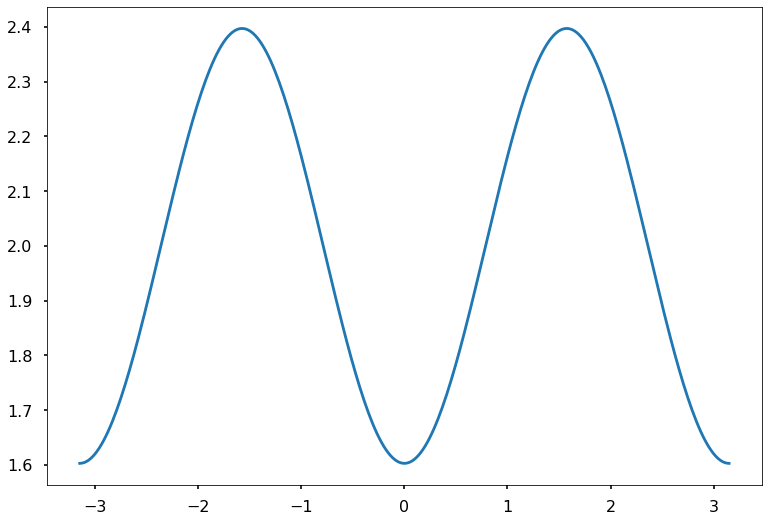

In [34]:
plt.plot(x,profile)

In [3]:


rp= 25e-6
J = 10
uB = 340
s = 10*rp
R = 20*rp

def fun(y, r):
    return [R*J/(r*epsilon_0*y[1]) - y[0]/r, e*y[0]/(Mp*y[1])]   # y는 E, u 로 이루어져있음

# = lambda t, s: np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)


t_eval = np.linspace(0, 5, 10)
y0 = 0
v0 = 25


r_list = np.linspace(R, rp, 1000)
y0 = 0
v0 = 25


def objective(v0):
    sol = solve_ivp(fun, [R, 0], [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

print(v0)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()

ValueError: Values in `t_eval` are not within `t_span`.